## Analysis
1. While Rural fares are higher on average, the sheer volume of rides in urban locales lead to a much higher reveneue stream.
2. Urban locations also brought in the lion's share of Pyber drivers. Perhaps this is due to the larger volume of rides, but it just as easily could be the other way around. More research will be needed to understand why there are so many more Pyber drivers in Urban locations.
3. Rural drivers appear to be doing the most amount of work per individual driver. Making up just 2.6% of the driver population, they're responsible for almost three times as many fares. Conversely, Urban drivers appear to be doing less work per individual. More research would be needed to determine if increasing the amount of rural drivers would make a positive impact.

-Iqbal

In [10]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
riders = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber = pd.merge(riders, city, on="city")

# Display the data table for preview
pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [11]:
# Obtain the x and y coordinates for each of the three city types

#subtype the pybers
pyber_u = pyber[pyber["type"] == "Urban"]
pyber_s = pyber[pyber["type"] == "Suburban"]
pyber_r = pyber[pyber["type"] == "Rural"]

#subtype the cities
city_u = city[city["type"]== "Urban"]
city_s = city[city["type"]== "Suburban"]
city_r = city[city["type"]== "Rural"]

#grab number of rides per city - x-axes
city_counts_u = pyber_u["city"].value_counts().sort_index()
city_counts_s = pyber_s["city"].value_counts().sort_index()
city_counts_r = pyber_r["city"].value_counts().sort_index()

#grab average fares for pybers - y-axes
ufares = pyber_u.groupby("city")["fare"].mean()
sfares = pyber_s.groupby("city")["fare"].mean()
rfares = pyber_r.groupby("city")["fare"].mean()

#sort cities
sorted_c = city.set_index(["city"]).sort_index()

#find count of drivers per type - bubble in bubble sort
drivers_u = sorted_c[sorted_c["type"]=="Urban"]["driver_count"]
drivers_s = sorted_c[sorted_c["type"]=="Suburban"]["driver_count"]
drivers_r = sorted_c[sorted_c["type"]=="Rural"]["driver_count"]

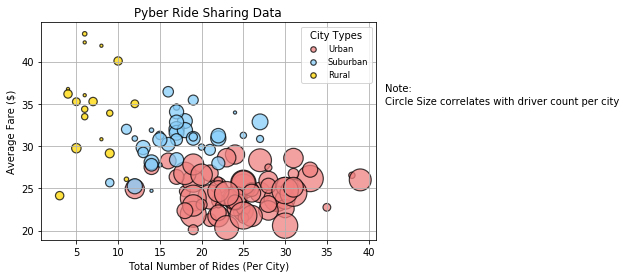

<Figure size 432x288 with 0 Axes>

In [12]:
# Build the scatter plots for each city types
scat_u = plt.scatter(city_counts_u,ufares, s = drivers_u*10, alpha = 0.75, edgecolors = "black", \
                     facecolors = "LightCoral", label = "Urban", linewidths = 1.2)
scat_s = plt.scatter(city_counts_s,sfares, s = drivers_s*10, alpha = 0.75, edgecolors = "black", \
                     facecolors = "LightSkyBlue", label = "Suburban", linewidths = 1.2)
scat_r = plt.scatter(city_counts_r,rfares, s = drivers_r*10, alpha = 0.75, edgecolors = "black", \
                     facecolors = "Gold", label = "Rural", linewidths = 1.2)

#scatter plot characteristics
plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data")

# Create a legend
lgnd = plt.legend(fontsize = "small", title = "City Types", markerscale = 0.4)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.annotate('Note:', xy=(42, 36.5), xycoords='data', annotation_clip=False)
plt.annotate('Circle Size correlates with driver count per city', xy=(42, 35), xycoords='data', annotation_clip=False)
plt.show()
# Save Figure
plt.savefig("pyber-bubbleplot.png")

# Total Fares by City Type

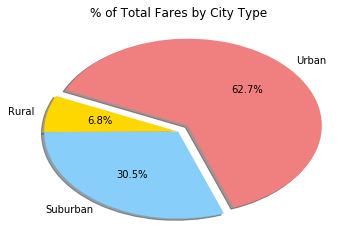

<Figure size 432x288 with 0 Axes>

In [13]:
# Calculate Type Percents
fare_percent_u = pyber_u["fare"].sum()/pyber["fare"].sum()
fare_percent_s = pyber_s["fare"].sum()/pyber["fare"].sum()
fare_percent_r = pyber_r["fare"].sum()/pyber["fare"].sum()

#chart characteristics
pie_fare = [fare_percent_u, fare_percent_r, fare_percent_s]
pie_labels = ["Urban","Rural","Suburban"]
explode = [0.1,0,0]
pie_colors = ["LightCoral", "Gold","LightSkyBlue"]

# Build Pie Chart
plt.pie(pie_fare, labels = pie_labels, autopct = '%1.1f%%', startangle = 290, explode=explode, \
        shadow = True, colors = pie_colors)
plt.title("% of Total Fares by City Type")
plt.show()

# Save Figure
plt.savefig("pyber-fares.png")

## Total Rides by City Type

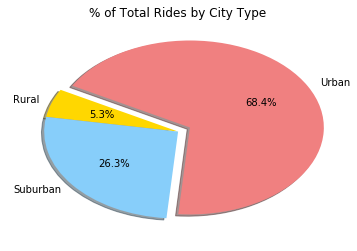

<Figure size 432x288 with 0 Axes>

In [14]:
# Calculate Ride Percents
ride_percent_u = len(pyber_u)/len(pyber)
ride_percent_r = len(pyber_r)/len(pyber)
ride_percent_s = len(pyber_s)/len(pyber)
pie_rides = [ride_percent_u, ride_percent_r, ride_percent_s]

# Build Pie Chart
plt.pie(pie_rides, labels = pie_labels, autopct = '%1.1f%%', startangle = 265, explode=explode, \
        shadow = True, colors = pie_colors)
plt.title("% of Total Rides by City Type")
plt.show()
# Save Figure
plt.savefig("pyber-rides.png")

## Total Drivers by City Type

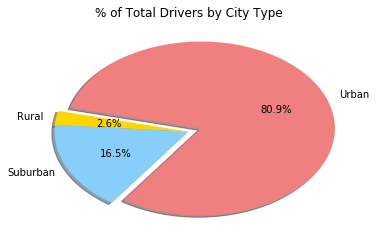

<Figure size 432x288 with 0 Axes>

In [15]:
# Calculate Driver Percents
driver_u = city_u["driver_count"].sum()/city["driver_count"].sum()
driver_r = city_r["driver_count"].sum()/city["driver_count"].sum()
driver_s = city_s["driver_count"].sum()/city["driver_count"].sum()
pie_drive = [driver_u, driver_r, driver_s]

# Build Pie Charts
plt.pie(pie_drive, labels = pie_labels, autopct = '%1.1f%%', startangle = 235, explode=explode, \
        shadow = True, colors = pie_colors)
plt.title("% of Total Drivers by City Type")
plt.show()
# Save Figure
plt.savefig("pyber-drivers.png")